# Check ChEBI annotation rate in MetaboLights

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
mtbls_stats = pd.read_csv('MetaboLights_annotation_kibana.csv')

In [20]:
mtbls_stats

,numberOfMetaboliteAssignedRows,identifier,metaboliteAssignmentFiles.numberOfAssignedRows,metaboliteAssignmentFiles.numberOfUnassignedRows,numberOfMetaboliteAssignedRows_Sum
0,7,MTBLS571,7,101,7.0
1,0,MTBLS574,NaN,NaN,0.0
2,120,MTBLS577,"67, 53","0, 0",120.0
3,37,MTBLS575,"11, 8, 14, 4","22, 42, 47, 40",37.0
4,0,MTBLS572,0,"8,368",0.0
...,...,...,...,...,...
1461,0,MTBLS555,0,"2,456",0.0
1462,234,MTBLS4461,234,263,234.0
1463,0,MTBLS518,"0, 0","7,806, 10,224",0.0
1464,0,MTBLS542,"0, 0","18,018, 7,056",0.0


In [25]:
# replace '-' with NaN
mtbls_stats = mtbls_stats.replace('-', '0')

In [28]:
# sum across multiple assays
mtbls_stats['numberOfMetaboliteAssignedRows_Sum'] = mtbls_stats['numberOfMetaboliteAssignedRows'].apply(lambda x: sum(map(float, x.split(','))))

In [26]:
mtbls_stats['metaboliteAssignmentFiles.numberOfUnassignedRows_Sum'] = mtbls_stats['metaboliteAssignmentFiles.numberOfUnassignedRows'].apply(lambda x: sum(map(float, x.split(','))))

In [10]:
mtbls_stats.dtypes

numberOfMetaboliteAssignedRows                       object
identifier                                           object
metaboliteAssignmentFiles.numberOfAssignedRows       object
metaboliteAssignmentFiles.numberOfUnassignedRows     object
numberOfMetaboliteAssignedRows_Sum                  float64
dtype: object

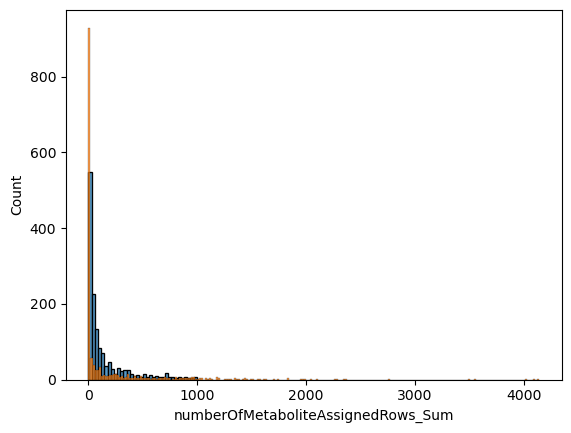

In [29]:
sns.histplot(
    mtbls_stats['numberOfMetaboliteAssignedRows_Sum']
)
sns.histplot(
    mtbls_stats['metaboliteAssignmentFiles.numberOfUnassignedRows_Sum']
)
plt.show()

# Workbench number of annotated REFMETS

In [33]:
named_met_df = pd.read_csv('Workbench_integration/Named_metabolites_Workbench.csv', index_col=0)

In [74]:
metabolights_chebis = pd.DataFrame(mtbls_stats['numberOfMetaboliteAssignedRows_Sum'].values, columns=['count_per_study'])
metabolights_chebis['Source'] = 'MetaboLights (ChEBI)'
workbench_refmets = pd.DataFrame(named_met_df['num_metabolites'].values, columns=['count_per_study'])
workbench_refmets['Source'] = 'Metabolomics Workbench (RefMet)'
combined_res = pd.concat([metabolights_chebis, workbench_refmets], axis=0)

In [84]:
combined_res

,count_per_study,Source
0,7.0,MetaboLights (ChEBI)
1,0.0,MetaboLights (ChEBI)
2,120.0,MetaboLights (ChEBI)
3,37.0,MetaboLights (ChEBI)
4,0.0,MetaboLights (ChEBI)
...,...,...
3274,53.0,Metabolomics Workbench (RefMet)
3275,168.0,Metabolomics Workbench (RefMet)
3276,97.0,Metabolomics Workbench (RefMet)
3277,162.0,Metabolomics Workbench (RefMet)


Number of database identifiers

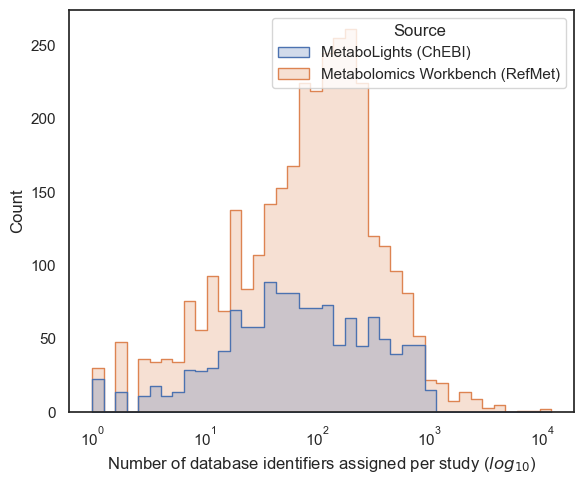

In [97]:
plt.figure(figsize=(6, 5))
sns.histplot(
    data=combined_res,
    x='count_per_study',
    hue='Source',
    log_scale=True,
    element='step',
    # fill=False
)
plt.xlabel('Number of database identifiers assigned per study ($log_{10}$)')
plt.tight_layout()
plt.show()

Number without identifiers

In [100]:
metabolights_annotated = pd.DataFrame(mtbls_stats['numberOfMetaboliteAssignedRows_Sum'].values, columns=['count_per_study'])
metabolights_annotated['Source'] = 'MetaboLights annotated (ChEBI)'
metabolights_unannotated = pd.DataFrame(mtbls_stats['metaboliteAssignmentFiles.numberOfUnassignedRows_Sum'].values, columns=['count_per_study'])
metabolights_unannotated['Source'] = 'MetaboLights unannotated (ChEBI)'
combined_res_annotation = pd.concat([metabolights_annotated, metabolights_unannotated], axis=0)

In [115]:
combined_res_annotation

,count_per_study,Source
0,7.0,MetaboLights annotated (ChEBI)
1,0.0,MetaboLights annotated (ChEBI)
2,120.0,MetaboLights annotated (ChEBI)
3,37.0,MetaboLights annotated (ChEBI)
4,0.0,MetaboLights annotated (ChEBI)
...,...,...
1461,458.0,MetaboLights unannotated (ChEBI)
1462,263.0,MetaboLights unannotated (ChEBI)
1463,1047.0,MetaboLights unannotated (ChEBI)
1464,99.0,MetaboLights unannotated (ChEBI)


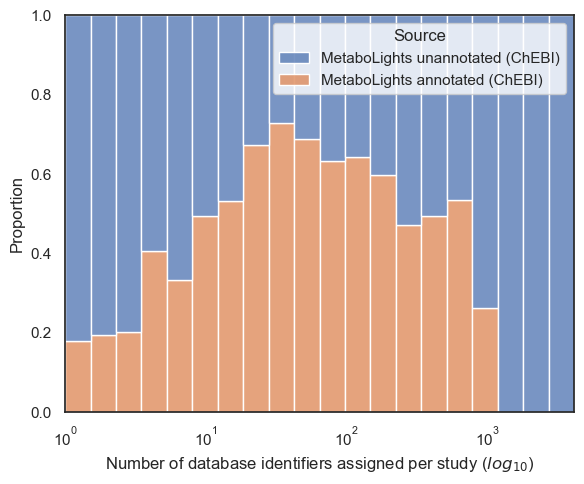

In [134]:
plt.figure(figsize=(6, 5))
sns.histplot(
    data=combined_res_annotation,
    x='count_per_study',
    hue='Source',
    log_scale=True,
    # element='step',
    multiple='fill',
    hue_order=['MetaboLights unannotated (ChEBI)', 'MetaboLights annotated (ChEBI)'],
    # fill=False
    stat="proportion"
)
plt.xlabel('Number of database identifiers assigned per study ($log_{10}$)')
plt.tight_layout()
plt.show()

In [142]:
combined_res_annotation[combined_res_annotation['count_per_study'] < 10].groupby('Source').count()

,count_per_study
Source,
MetaboLights annotated (ChEBI),311
MetaboLights unannotated (ChEBI),861


In [111]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
named_met_df['num_metabolites'].describe()

count     3279.000000
mean       200.111924
std        467.348021
min          1.000000
25%         31.000000
50%         98.000000
75%        213.000000
max      11992.000000
Name: num_metabolites, dtype: float64

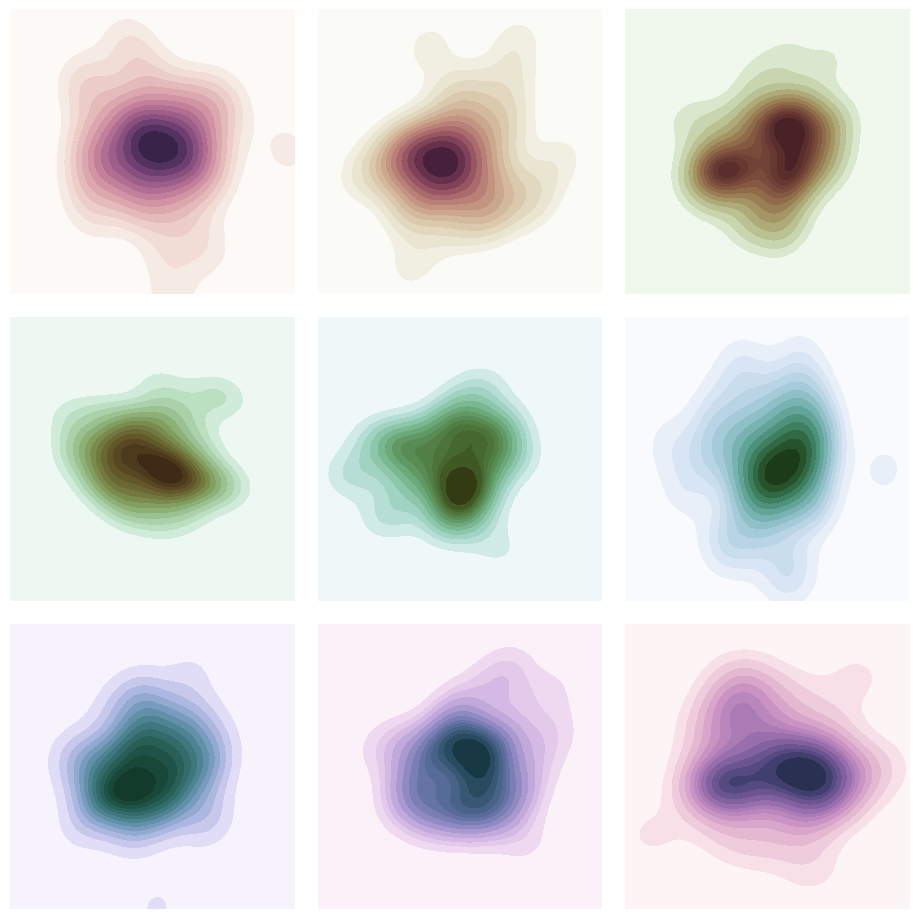

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.normal(size=(2, 50))
    sns.kdeplot(
        x=x, y=y,
        cmap=cmap, fill=True,
        clip=(-5, 5), cut=10,
        thresh=0, levels=15,
        ax=ax,
    )
    ax.set_axis_off()

ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
f.subplots_adjust(0, 0, 1, 1, .08, .08)